In [1]:
import numpy as np 
import pandas as pd
from utils.utils import *
from utils import plotting as plotting

In [2]:
acc_sample = load_modality('mm-fit/w00/w00_sw_r_acc.npy')
gyr_sample = load_modality('mm-fit/w00/w00_sw_r_gyr.npy')

In [3]:
gyr_sample[0,1] 

1562790867573.0

In [4]:
gyr_sample[4,1]

1562790867601.0

In [5]:
acc_sample

array([[ 4.05000000e+03,  1.56279087e+12, -7.02459240e+00,
        -1.67411880e+00,  5.97796900e+00],
       [ 4.05000000e+03,  1.56279087e+12, -6.99345730e+00,
        -3.42487800e-01,  5.82229300e+00],
       [ 4.05000000e+03,  1.56279087e+12, -6.81862070e+00,
         1.36516120e+00,  6.18394100e+00],
       ...,
       [ 6.79670000e+04,  1.56279300e+12, -4.38288600e+00,
        -3.61408470e+00,  7.69998800e+00],
       [ 6.79670000e+04,  1.56279300e+12, -4.60562300e+00,
        -3.68114520e+00,  7.66166800e+00],
       [ 6.79670000e+04,  1.56279300e+12, -4.70860860e+00,
        -3.74581070e+00,  7.66645770e+00]])

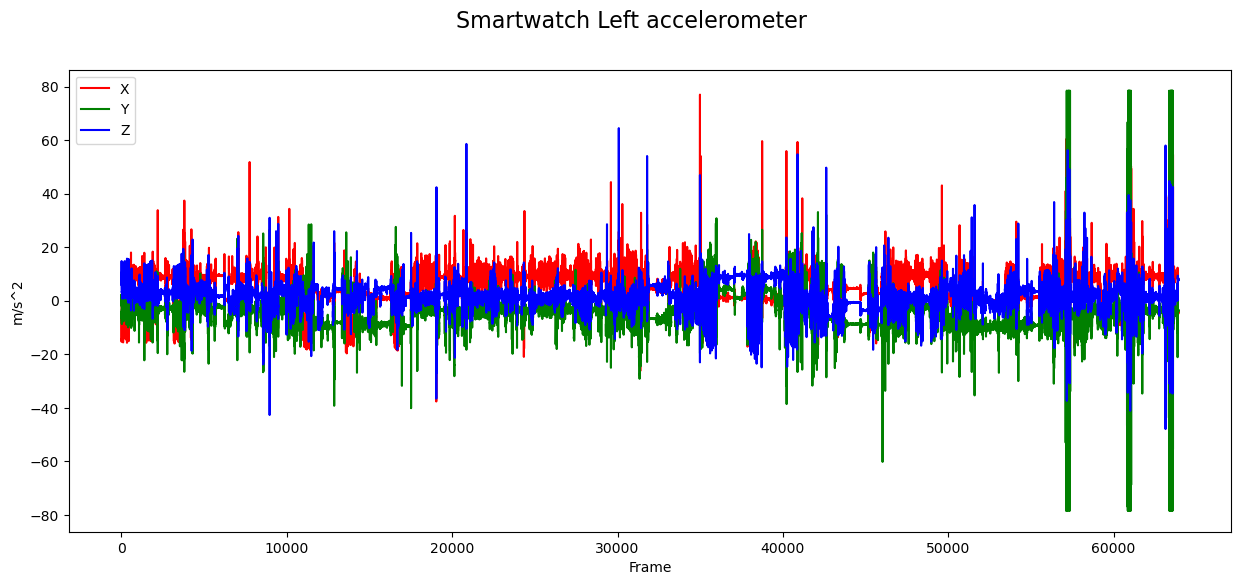

In [6]:
plotting.plot_sensor(acc_sample, data_type='acc', title="Smartwatch Left accelerometer", overlay=True)

In [7]:
label_df = pd.read_csv('mm-fit/w00/w00_labels.csv', names = ['start_frame', 'end_frame', 'repititions', 'label'])
label_df.head()

,start_frame,end_frame,repititions,label
0,4040,4500,10,squats
1,5435,5928,10,squats
2,7200,7685,10,squats
3,8770,9197,11,pushups
4,11160,11586,10,pushups


In [8]:
from tqdm import tqdm
def create_df(acc_data, gyr_data, label_df, person_id = 0):

    # create dataframes for acceleromters and gyrosccopes
    acc_df = pd.DataFrame(acc_data, columns=['frame', 'timestamp', 'acc_X', 'acc_Y', 'acc_Z']).reset_index()
    gyr_df = pd.DataFrame(gyr_data, columns=['frame', 'timestamp', 'gyr_X', 'gyr_Y', 'gyr_Z']).reset_index()

    # combine the two dataframes
    df = pd.merge(acc_df, gyr_df, how = 'inner', on = ['index', 'frame', 'timestamp'])
    df['label'] = " "
    df['user_id'] = person_id

    # start at the begnining of the labels
    label_tracker = 0
    label = label_df.loc[label_tracker, 'label']
    
    # loop througbn the dataframe
    for i, row in tqdm(df.iterrows()):
        
        # move to next label if frame is past current exercise
        if row['frame'] > label_df.loc[label_tracker, 'end_frame']:
            label_tracker += 1

            # move to next exercise
            if label_tracker < len(label_df):
                label = label_df.loc[label_tracker, 'label']

            # break from loop if no more exercises
            else:
                df.loc[i:, 'label'] = 'non-e'
                break
        
        # assign proper label
        if row['frame'] > label_df.loc[label_tracker, 'start_frame']:
            df.at[i, 'label'] = label
        else:
            df.at[i, 'label'] = "non-e"

    return df


signal_df = create_df(acc_sample, gyr_sample, label_df)
signal_df.head(20)

92536it [00:01, 47123.00it/s]


,index,frame,timestamp,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z,label,user_id
0,3,4050.0,1.562791e+12,-6.868917,2.414180,6.643784,0.777929,-0.293816,0.944709,squats,0
1,8,4052.0,1.562791e+12,-10.178833,-1.142424,6.104905,-0.574526,0.298723,0.823757,squats,0
2,9,4052.0,1.562791e+12,-11.405084,-1.729204,6.933582,-0.529322,0.158224,0.513438,squats,0
3,11,4053.0,1.562791e+12,-12.260105,-1.532813,9.160950,-0.470679,-0.028701,0.489003,squats,0
4,14,4054.0,1.562791e+12,-11.469749,0.043110,10.344090,-0.100495,-0.070240,0.374161,squats,0
5,15,4054.0,1.562791e+12,-12.188255,0.227527,10.142908,-0.233664,0.026277,0.269092,squats,0
6,18,4055.0,1.562791e+12,-14.578485,-0.268242,11.182346,-0.565974,0.169219,-0.101092,squats,0
7,21,4056.0,1.562791e+12,-15.031143,-0.946033,13.218113,-0.342398,-0.277934,-0.242813,squats,0
8,22,4056.0,1.562791e+12,-14.549745,-0.505349,13.761783,-0.210451,-0.356125,-0.178061,squats,0
9,26,4057.0,1.562791e+12,-14.523399,-1.084944,13.778548,-0.054069,-0.153317,-0.472498,squats,0


In [9]:
signal_df.columns

Index(['index', 'frame', 'timestamp', 'acc_X', 'acc_Y', 'acc_Z', 'gyr_X',
       'gyr_Y', 'gyr_Z', 'label', 'user_id'],
      dtype='object')

In [55]:
import matplotlib.pyplot as plt
def plot_sensor_label(data, data_type,label, title='', filepath=None, size=(15, 6), overlay=True, seconds = 10):


    data = data[(data['label'] == label) & (data['frame'] < 100*seconds+min(data[data['label'] == label]['frame']))]

    data_t = data.index

    if data_type == 'acc':
        text = 'Accelerometer'
        ylabel = 'm/s^2'

    elif data_type == 'gyr':
        text = 'Gyroscope'
        ylabel = 'radians/s'

    else:
        raise Exception('The data_type argument, {}, is not valid. Must be acc, gyr, mag, or hr'.format(data_type))

    fig, ax = plt.subplots(1, 1, figsize=size, sharex=True)

    ax.plot(data_t, data.loc[:, f'{data_type}_X'], 'r-', label='X')
    ax.plot(data_t, data.loc[:, f'{data_type}_Y'], 'g-', label='Y')
    ax.plot(data_t, data.loc[:, f'{data_type}_Z'], 'b-', label='Z')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Frame')
    plt.legend()

    fig.suptitle(title, size=16)
    if filepath is not None:
        fig.savefig(filepath, bbox_inches='tight')
    plt.show()

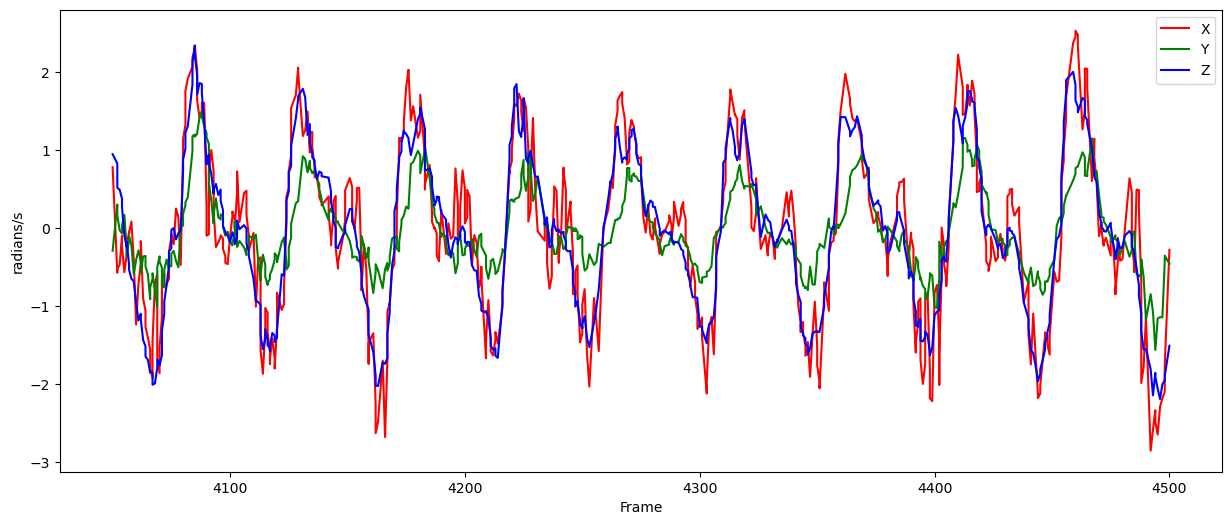

In [20]:
plot_sensor_label(signal_df, 'gyr', 'squats', seconds = 10)

In [12]:

def create_examples(df, seconds=10):
    ex_df = pd.DataFrame(columns=['id', 'sig_array', 'label'])
    label = df.loc[0, 'label']
    counter = 0
    arr = []

    for i, row in tqdm(df.iterrows(), total=len(df)):
        if row['label'] != label:
            label = row['label']
            counter = 0
            arr = []

        arr.append(row[['gyr_X', 'gyr_Y', 'gyr_Z', 'acc_X', 'acc_Y', 'acc_Z']].values)
        counter += 1  # Increment counter

        if counter >= seconds * 100:
            ex_df.loc[len(ex_df)] = [len(ex_df), np.array(arr), label]
            counter = 0
            arr = []

    return ex_df


ex_df = create_examples(signal_df, 3)      



100%|██████████| 93031/93031 [00:06<00:00, 13844.36it/s]


In [13]:
ex_df['label'].value_counts()

label
non-e                      224
lunges                      11
situps                       7
squats                       6
dumbbell_shoulder_press      6
dumbbell_rows                6
bicep_curls                  6
lateral_shoulder_raises      6
pushups                      5
tricep_extensions            3
jumping_jacks                3
Name: count, dtype: int64

In [14]:
ex_df['label'].unique()

array(['squats', 'non-e', 'pushups', 'dumbbell_shoulder_press', 'lunges',
       'dumbbell_rows', 'situps', 'tricep_extensions', 'bicep_curls',
       'lateral_shoulder_raises', 'jumping_jacks'], dtype=object)

In [15]:
ex_df.loc[0, 'sig_array'].shape

(300, 6)

In [16]:
signal_df.loc[0, 'timestamp'] - signal_df.loc[96, 'timestamp']

-1909.0

In [17]:
signal_df['label'].value_counts()

label
non-e                      71519
lunges                      3691
situps                      2755
dumbbell_shoulder_press     2280
dumbbell_rows               2128
bicep_curls                 2095
squats                      2087
lateral_shoulder_raises     1907
pushups                     1809
tricep_extensions           1467
jumping_jacks               1293
Name: count, dtype: int64

In [18]:
test = np.load('data/constrained_workout/preprocessed_numpy_data/np_exercise_data/Push ups/Push ups_133.npy')
test.shape

(18, 2994)

In [26]:
xfit = pd.DataFrame(test[:6, :].T, columns = ['acc_X', 'acc_Y', 'acc_Z', 'gyr_X', 'gyr_Y', 'gyr_Z'])
xfit['label'] = 'push_ups'
xfit.head()

,acc_X,acc_Y,acc_Z,gyr_X,gyr_Y,gyr_Z
0,9.267402,0.385244,3.366701,0.003663,0.008548,-0.010990
1,9.250870,0.381329,3.372357,0.002791,0.009202,-0.011208
2,9.234338,0.377413,3.378013,0.001919,0.009856,-0.011426
3,9.217805,0.373498,3.383669,0.001047,0.010510,-0.011644
4,9.201273,0.369582,3.389324,0.000174,0.011164,-0.011862


In [31]:
import json
with open('participant_ex_code_map.txt', 'rb') as f:
    part_info = json.load(f)

part_info['P51']

[726, 727, 728, 729, 730, 734, 735]

In [50]:
import os

import re

def find_key_by_value(dictionary, filename):
    # Extract numeric part from the filename
    match = re.search(r'(\d+)', filename)
    if not match:
        return None  
    
    num = int(match.group(1))  # Convert extracted number to integer

    # Search for the key containing this number in its list of values
    for key, values in dictionary.items():
        if num in values:
            return key

    return None 

def load_crossfit(datapath = None, info_path=None):

    if not datapath:
        datapath = "/Users/jacobgottesman/Public/DS 4440/smartwatch-activity-recognition/data/constrained_workout/preprocessed_numpy_data/np_exercise_data"

    if not info_path:
        info_path = 'participant_ex_code_map.txt'

    with open(info_path, 'rb') as f:
        part_info = json.load(f)

    df = pd.DataFrame(columns = ['acc_X', 'acc_Y', 'acc_Z', 'gyr_X', 'gyr_Y', 'gyr_Z', 'user_id', 'label'])

    for root, dirs, files in os.walk(datapath):
        for dir in dirs:

            # loop through the files
            print("processing files from", dir)
            for root, dirs1, files1 in os.walk(datapath+'/'+dir):

                # loop through all the files
                for file in tqdm(files1):


                    data = np.load(f'{datapath}/{dir}/{file}')
                    temp_df = pd.DataFrame(data[:6, :].T, columns = ['acc_X', 'acc_Y', 'acc_Z', 'gyr_X', 'gyr_Y', 'gyr_Z'])
                    temp_df['label'] = dir.lower().replace(' ', '')
                    temp_df['user_id'] = find_key_by_value(part_info, file)

                    df = pd.concat([df, temp_df], axis = 0)

    return df

In [51]:
df = load_crossfit()

processing files from KB Press


  0%|          | 0/44 [00:00<?, ?it/s]/var/folders/d4/c154mt9s11x5q965j91l06qw0000gn/T/ipykernel_8887/2216819411.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], axis = 0)
100%|██████████| 44/44 [00:00<00:00, 641.97it/s]


processing files from Box jumps


100%|██████████| 47/47 [00:00<00:00, 294.85it/s]


processing files from Dead lifts


100%|██████████| 48/48 [00:00<00:00, 148.11it/s]


processing files from Squats


100%|██████████| 44/44 [00:00<00:00, 112.63it/s]


processing files from Crunches


100%|██████████| 42/42 [00:00<00:00, 89.26it/s]


processing files from Push ups


100%|██████████| 50/50 [00:00<00:00, 76.17it/s]


processing files from KB Squat press


100%|██████████| 39/39 [00:00<00:00, 60.53it/s]


processing files from Null


100%|██████████| 7/7 [00:00<00:00, 51.24it/s]


processing files from Wall balls


100%|██████████| 42/42 [00:00<00:00, 49.06it/s]


processing files from Burpees


100%|██████████| 47/47 [00:01<00:00, 43.43it/s]


processing files from Pull ups


100%|██████████| 43/43 [00:01<00:00, 40.57it/s]


In [69]:
df['label'].value_counts()

label
burpees         189031
boxjumps        178455
deadlifts       173752
crunches        161433
pushups         154126
wallballs       143426
squats          136635
kbsquatpress    127833
kbpress         121313
pullups          84666
null             67936
Name: count, dtype: int64

In [58]:
import matplotlib.pyplot as plt
def plot_sensor_label(data, data_type,label, title='', filepath=None, size=(15, 6), overlay=True, seconds = 10):


    data = data[(data['label'] == label) & (data.index < 100*seconds+min(data[data['label'] == label].index))]

    data_t = data.index

    if data_type == 'acc':
        text = 'Accelerometer'
        ylabel = 'm/s^2'

    elif data_type == 'gyr':
        text = 'Gyroscope'
        ylabel = 'radians/s'

    else:
        raise Exception('The data_type argument, {}, is not valid. Must be acc, gyr, mag, or hr'.format(data_type))

    fig, ax = plt.subplots(1, 1, figsize=size, sharex=True)

    ax.plot(data_t, data.loc[:, f'{data_type}_X'], 'r-', label='X')
    ax.plot(data_t, data.loc[:, f'{data_type}_Y'], 'g-', label='Y')
    ax.plot(data_t, data.loc[:, f'{data_type}_Z'], 'b-', label='Z')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Frame')
    plt.legend()

    fig.suptitle(title, size=16)
    if filepath is not None:
        fig.savefig(filepath, bbox_inches='tight')
    plt.show()

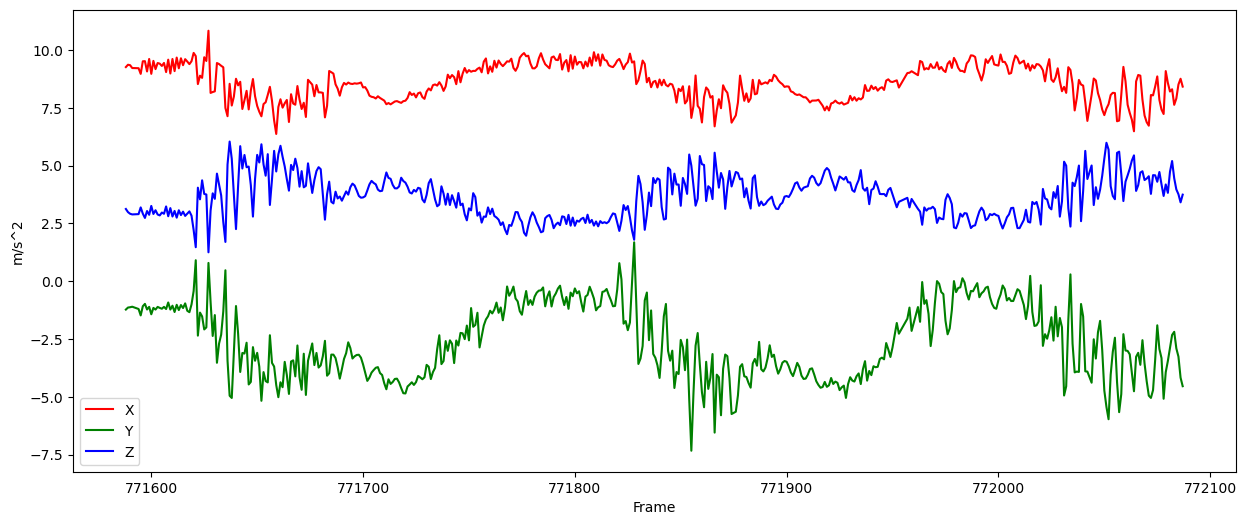

In [78]:
plot_sensor_label(df, 'acc', 'pushups', seconds = 5)

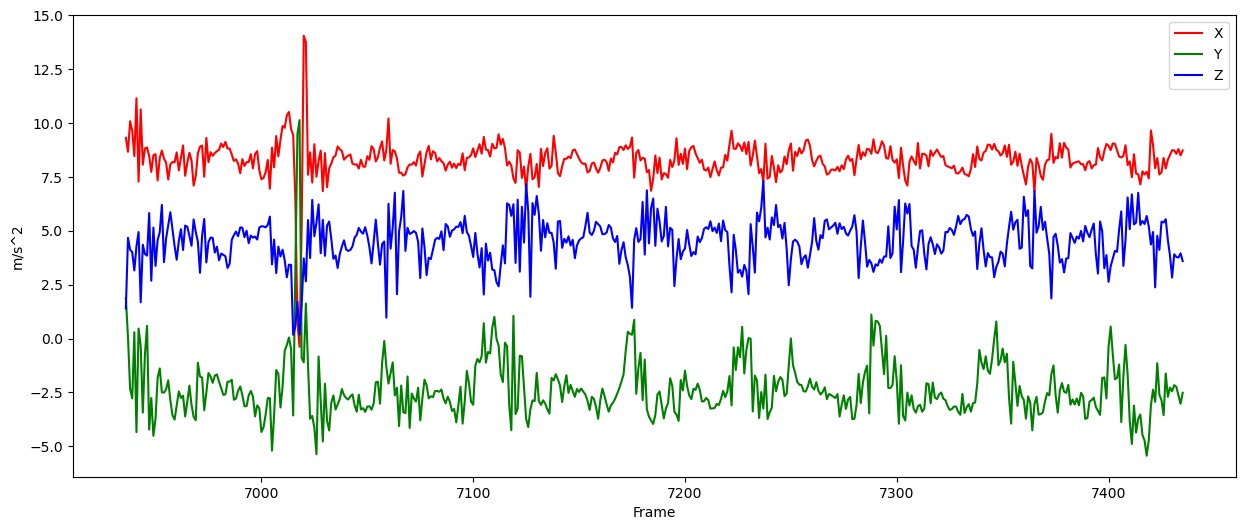

In [79]:
plot_sensor_label(signal_df, 'acc', 'pushups', seconds = 5)